In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
df = pd.read_csv('train.csv',sep=';')

<li>1 - age (numeric)</li>
<li>2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")</li>
<li>3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)</li>
<li>4 - education (categorical: "unknown","secondary","primary","tertiary")</li>
<li>5 - default: has credit in default? (binary: "yes","no")</li>
<li>6 - balance: average yearly balance, in euros (numeric)</li>
<li>7 - housing: has housing loan? (binary: "yes","no")</li>
<li>8 - loan: has personal loan? (binary: "yes","no")</li>

# related with the last contact of the current campaign:
<li>9 - contact: contact communication type (categorical: "unknown","telephone","cellular")</li>
<li>10 - day: last contact day of the month (numeric)</li>
<li>11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")</li>
<li>12 - duration: last contact duration, in seconds (numeric)</li>

# other attributes:
<li>13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)</li>
<li>14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)</li>
<li>15 - previous: number of contacts performed before this campaign and for this client (numeric)</li>
<li>16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")</li>

Output variable (desired target):
<li>17 - y - has the client subscribed a term deposit? (binary: "yes","no")</li>

<li>age</li>
<li>job</li>
<li>marital</li>
<li>education</li>
<li>default</li>
<li>housing</li>
<li>loan</li>
<li>contact</li>
<li>month</li>
<li>campaign</li>
<li>balance_class</li>
<li>previous_bool</li>

## Imbalanced Dataset

In [3]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [4]:
class_count_0, class_count_1 = df['y'].value_counts()

# Separate class
class_0 = df[df['y'] == 'no']
class_1 = df[df['y'] == 'yes']# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (39922, 17)
class 1: (5289, 17)


total class of 1 and 0: yes    39922
no     39922
Name: y, dtype: int64


<Axes: title={'center': 'count (target)'}>

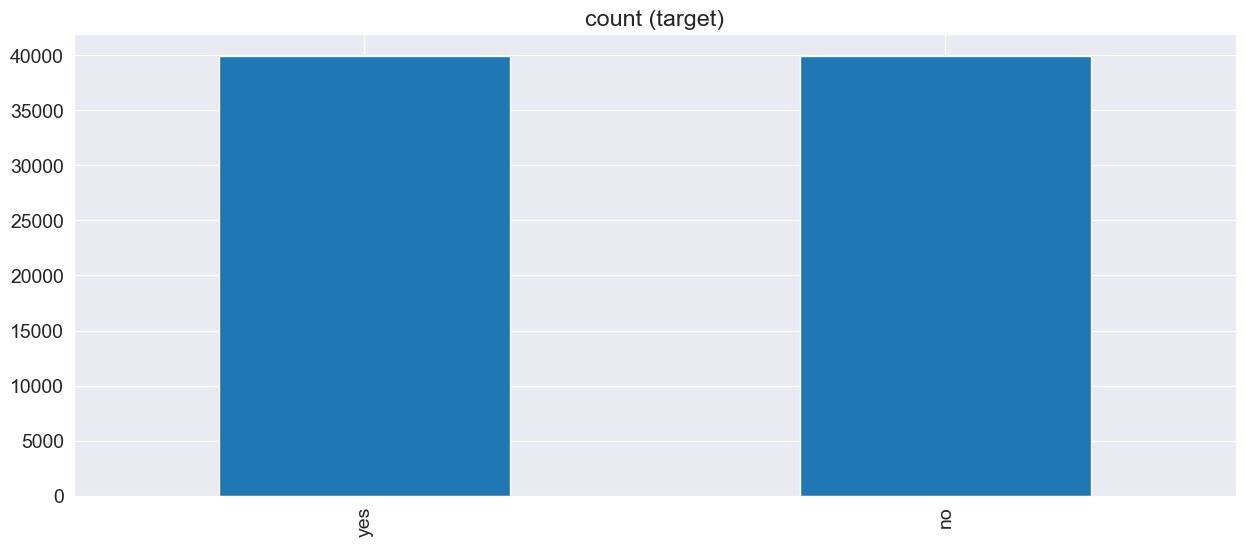

In [5]:
class_1_over = class_1.sample(class_count_0, replace=True)

df = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",df['y'].value_counts())# plot the count after under-sampeling
df['y'].value_counts().plot(kind='bar', title='count (target)')

In [6]:
df['job'].unique()

array(['retired', 'admin.', 'unemployed', 'technician', 'management',
       'blue-collar', 'housemaid', 'student', 'self-employed', 'services',
       'entrepreneur', 'unknown'], dtype=object)

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
42873,62,retired,married,secondary,no,569,no,no,cellular,4,feb,94,5,184,1,success,yes
5856,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes
18780,58,unemployed,married,primary,no,1183,no,no,cellular,31,jul,1721,5,-1,0,unknown,yes
39214,32,technician,single,tertiary,no,2684,yes,no,cellular,18,may,542,2,-1,0,unknown,yes
31771,65,retired,married,secondary,no,20806,no,no,telephone,8,apr,523,2,-1,0,unknown,yes


In [8]:
df['marital'].value_counts()

married     45349
single      25142
divorced     9353
Name: marital, dtype: int64

In [9]:
df[df['poutcome']=='success']['y'].sample(10)

43570    yes
42955    yes
44214    yes
33742    yes
43716    yes
45002    yes
41240    yes
45174    yes
30458     no
43164    yes
Name: y, dtype: object

# Bivariate Analysis

In [10]:
req_cat = ['job','education','default','poutcome']
req_num = ['age','balance','duration','campaign','pdays','previous']

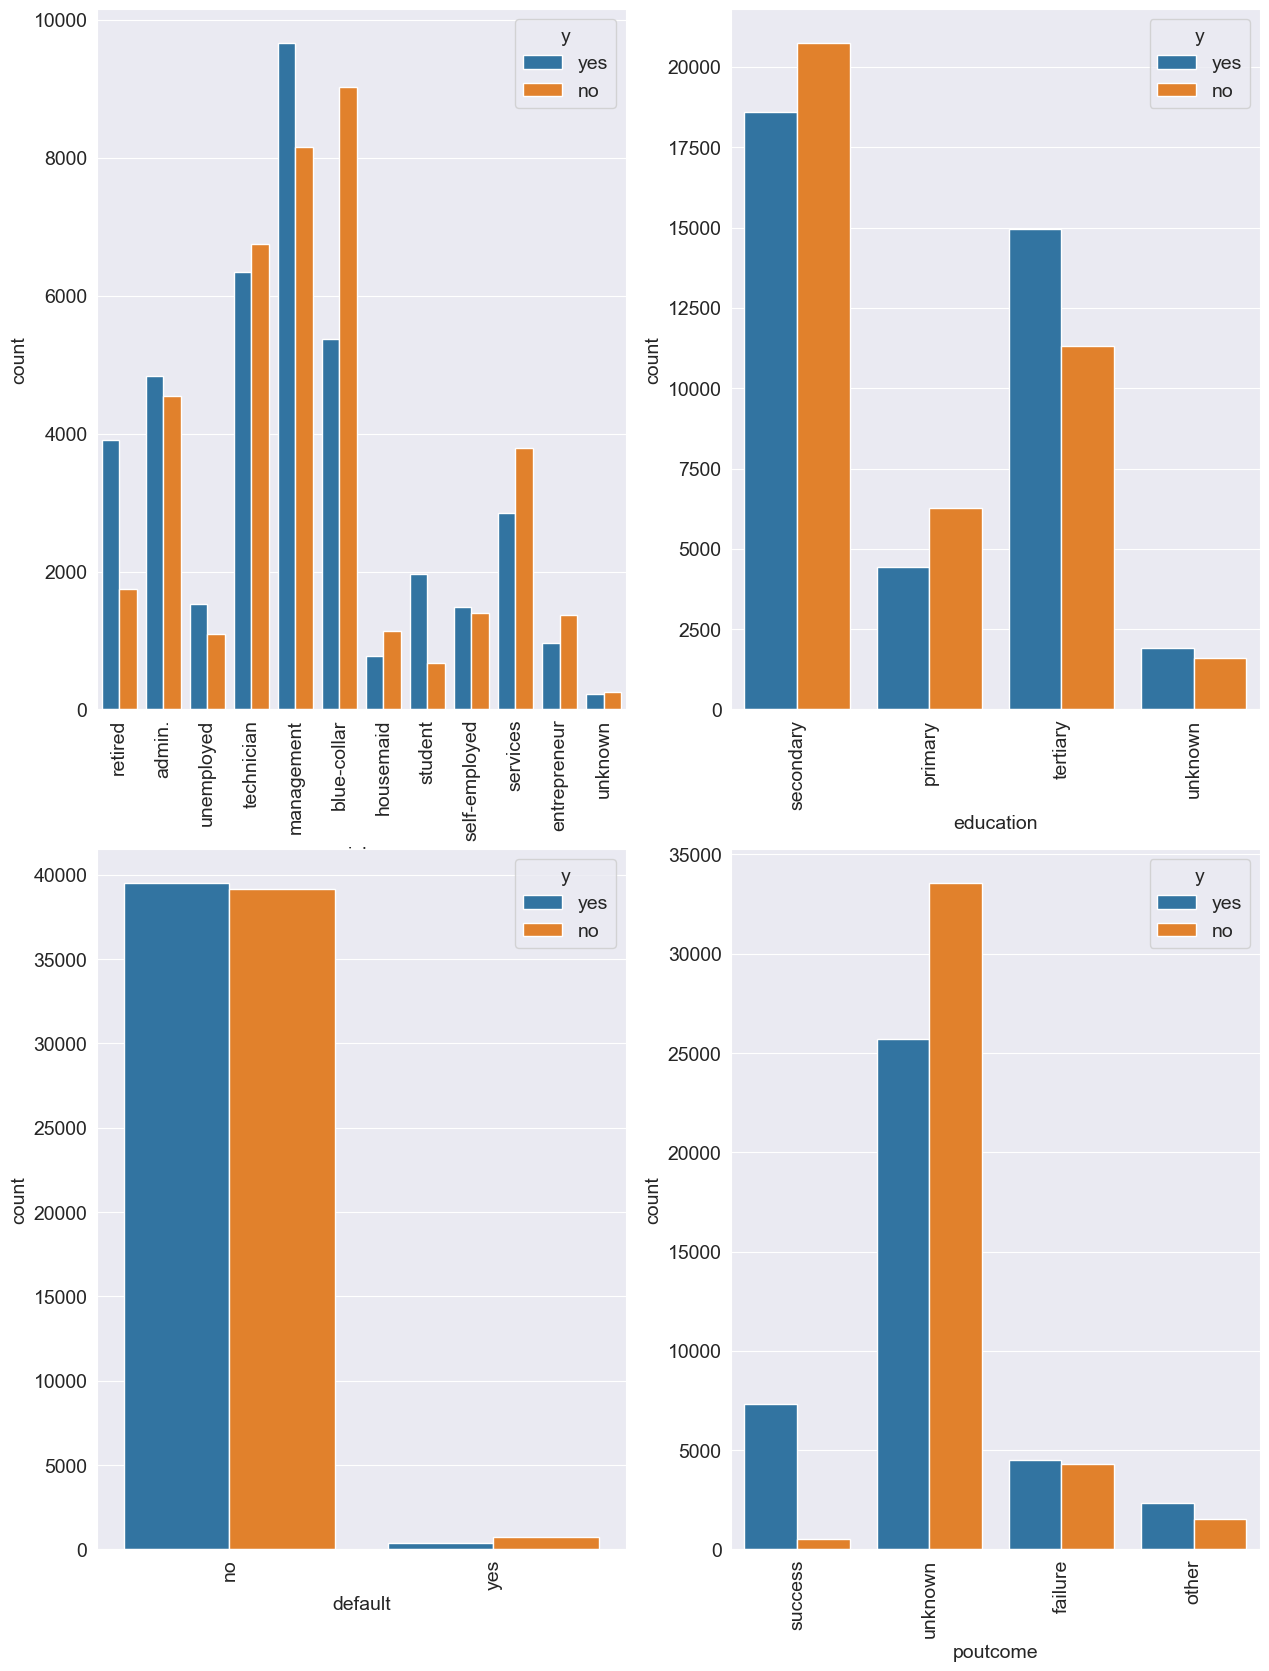

In [11]:
plt.figure(figsize=(15,20))
for i in enumerate(req_cat):
    plt.subplot(2,2,i[0]+1)
    sns.countplot(x=df[i[1]],hue=df['y'])
    plt.xticks(rotation ='vertical')

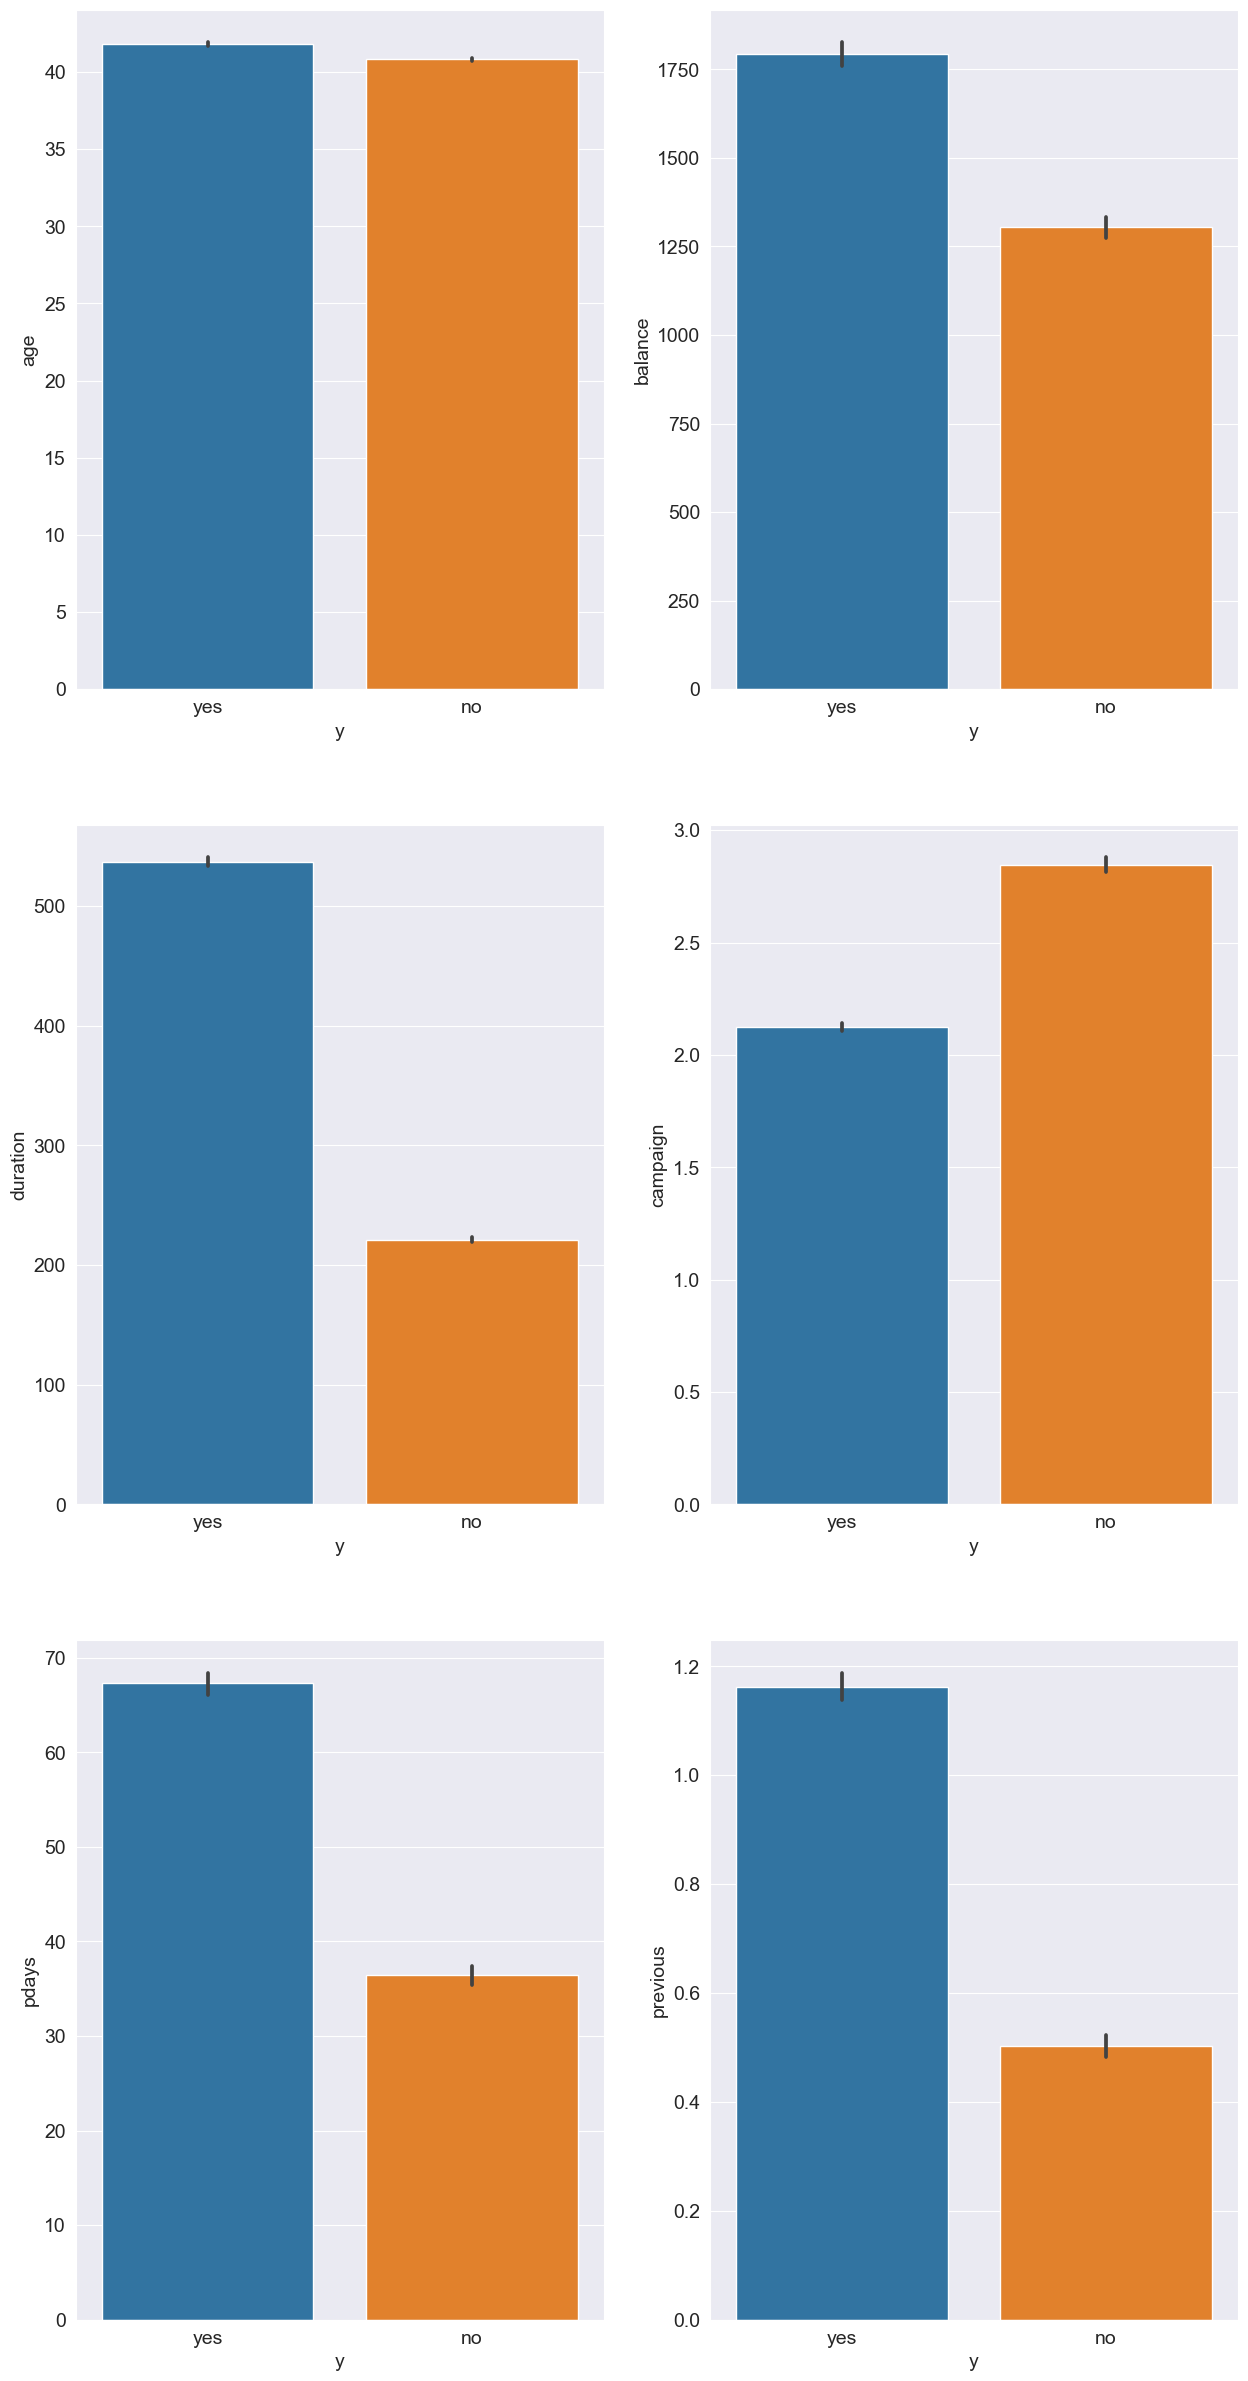

In [12]:
plt.figure(figsize=(15,30))
for i in enumerate(req_num):
    plt.subplot(3,2,i[0]+1)
    sns.barplot(x=df['y'],y=df[i[1]])

# Univariate Analysis

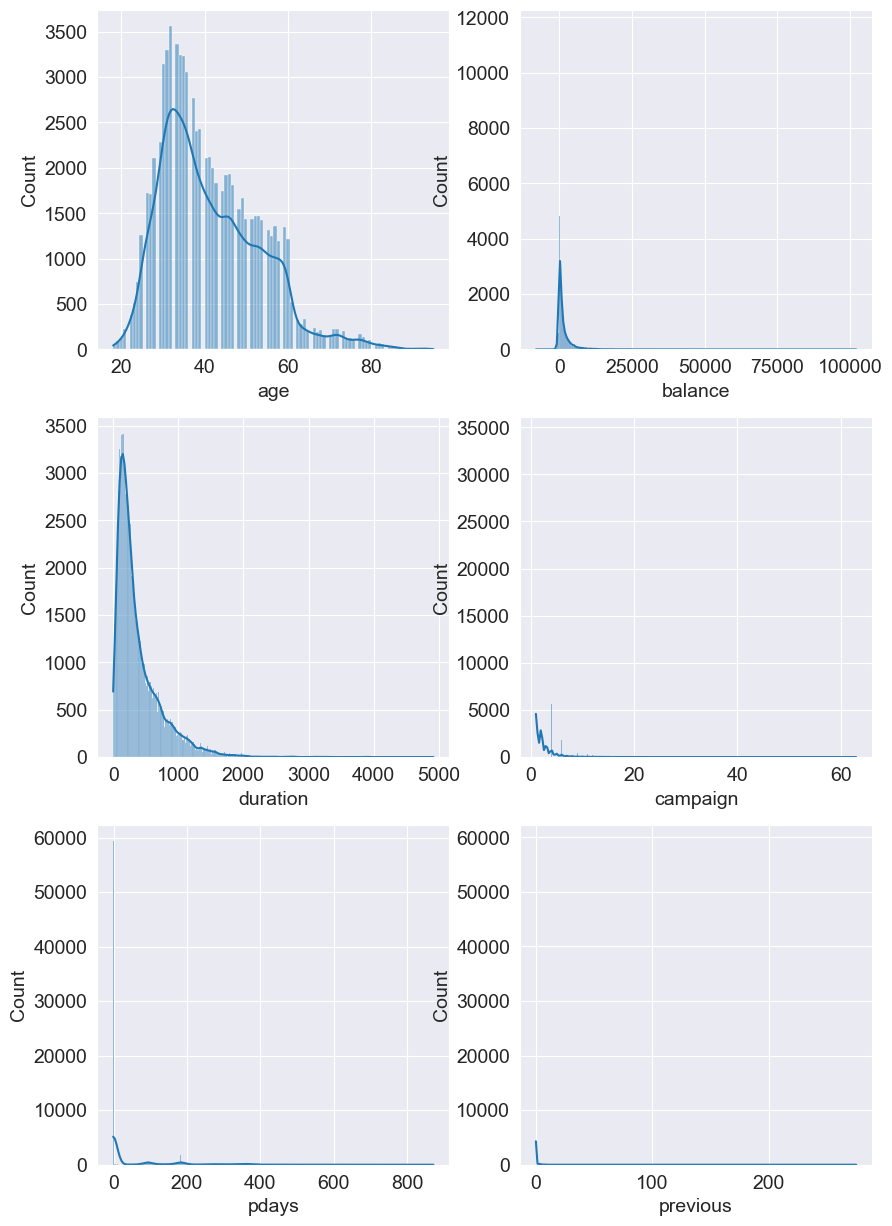

In [13]:
plt.figure(figsize=(10,15))
for i in enumerate(req_num):
    plt.subplot(3,2,i[0]+1)
    sns.histplot(x=df[i[1]],kde=True)

In [14]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,79844.000000,79844.000000,79844.000000,79844.000000,79844.000000,79844.000000,79844.000000
mean,41.314927,1548.896385,15.477857,379.006801,2.485948,51.865676,0.832135
std,11.949113,3189.514906,8.395864,350.179610,2.652324,108.502657,2.444092
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,123.750000,8.000000,143.000000,1.000000,-1.000000,0.000000
50%,39.000000,558.000000,15.000000,260.000000,2.000000,-1.000000,0.000000
75%,49.000000,1738.000000,21.000000,507.000000,3.000000,52.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


age
balance
duration
campaign
pdays
previous


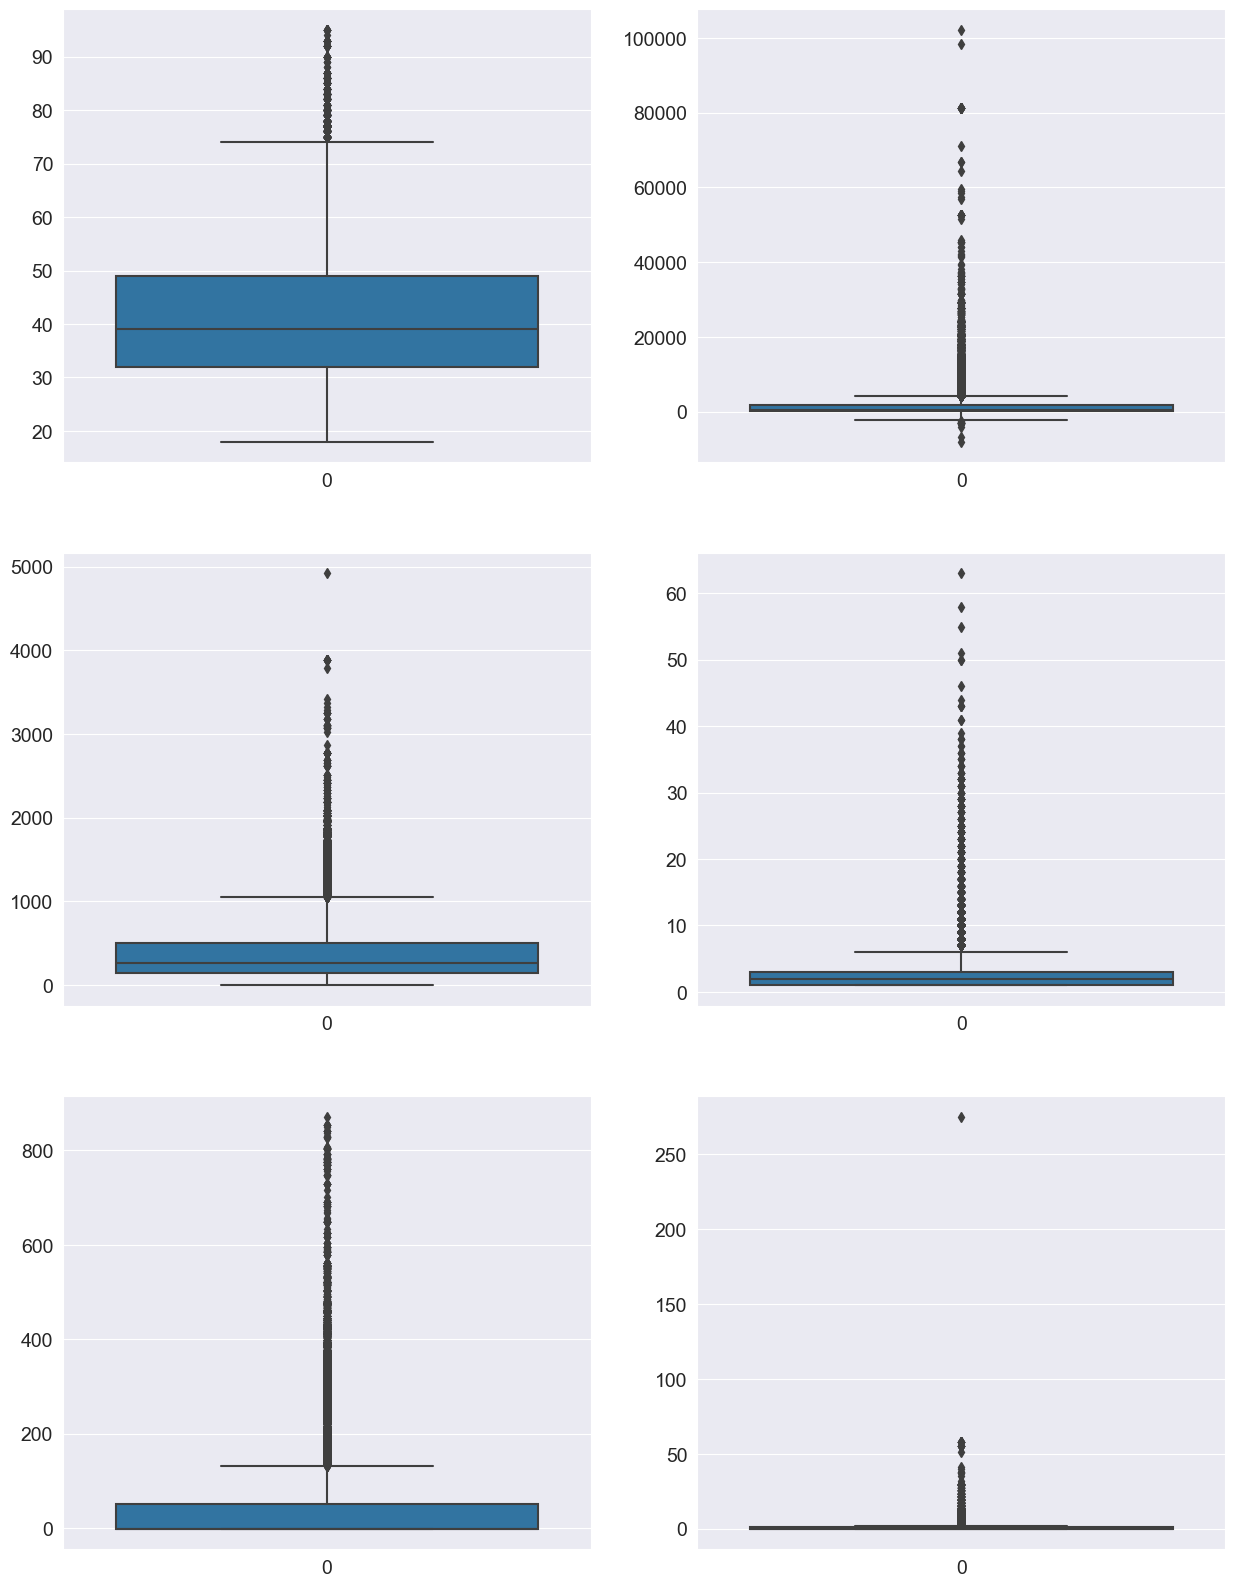

In [15]:
plt.figure(figsize=(15,20))
for i in enumerate(req_num):
    plt.subplot(3,2,i[0]+1)
    print(i[1])
    sns.boxplot(df[i[1]])
#     plt.xticks(rotation ='vertical')

In [16]:
# df= df[df['balance']<=81000]

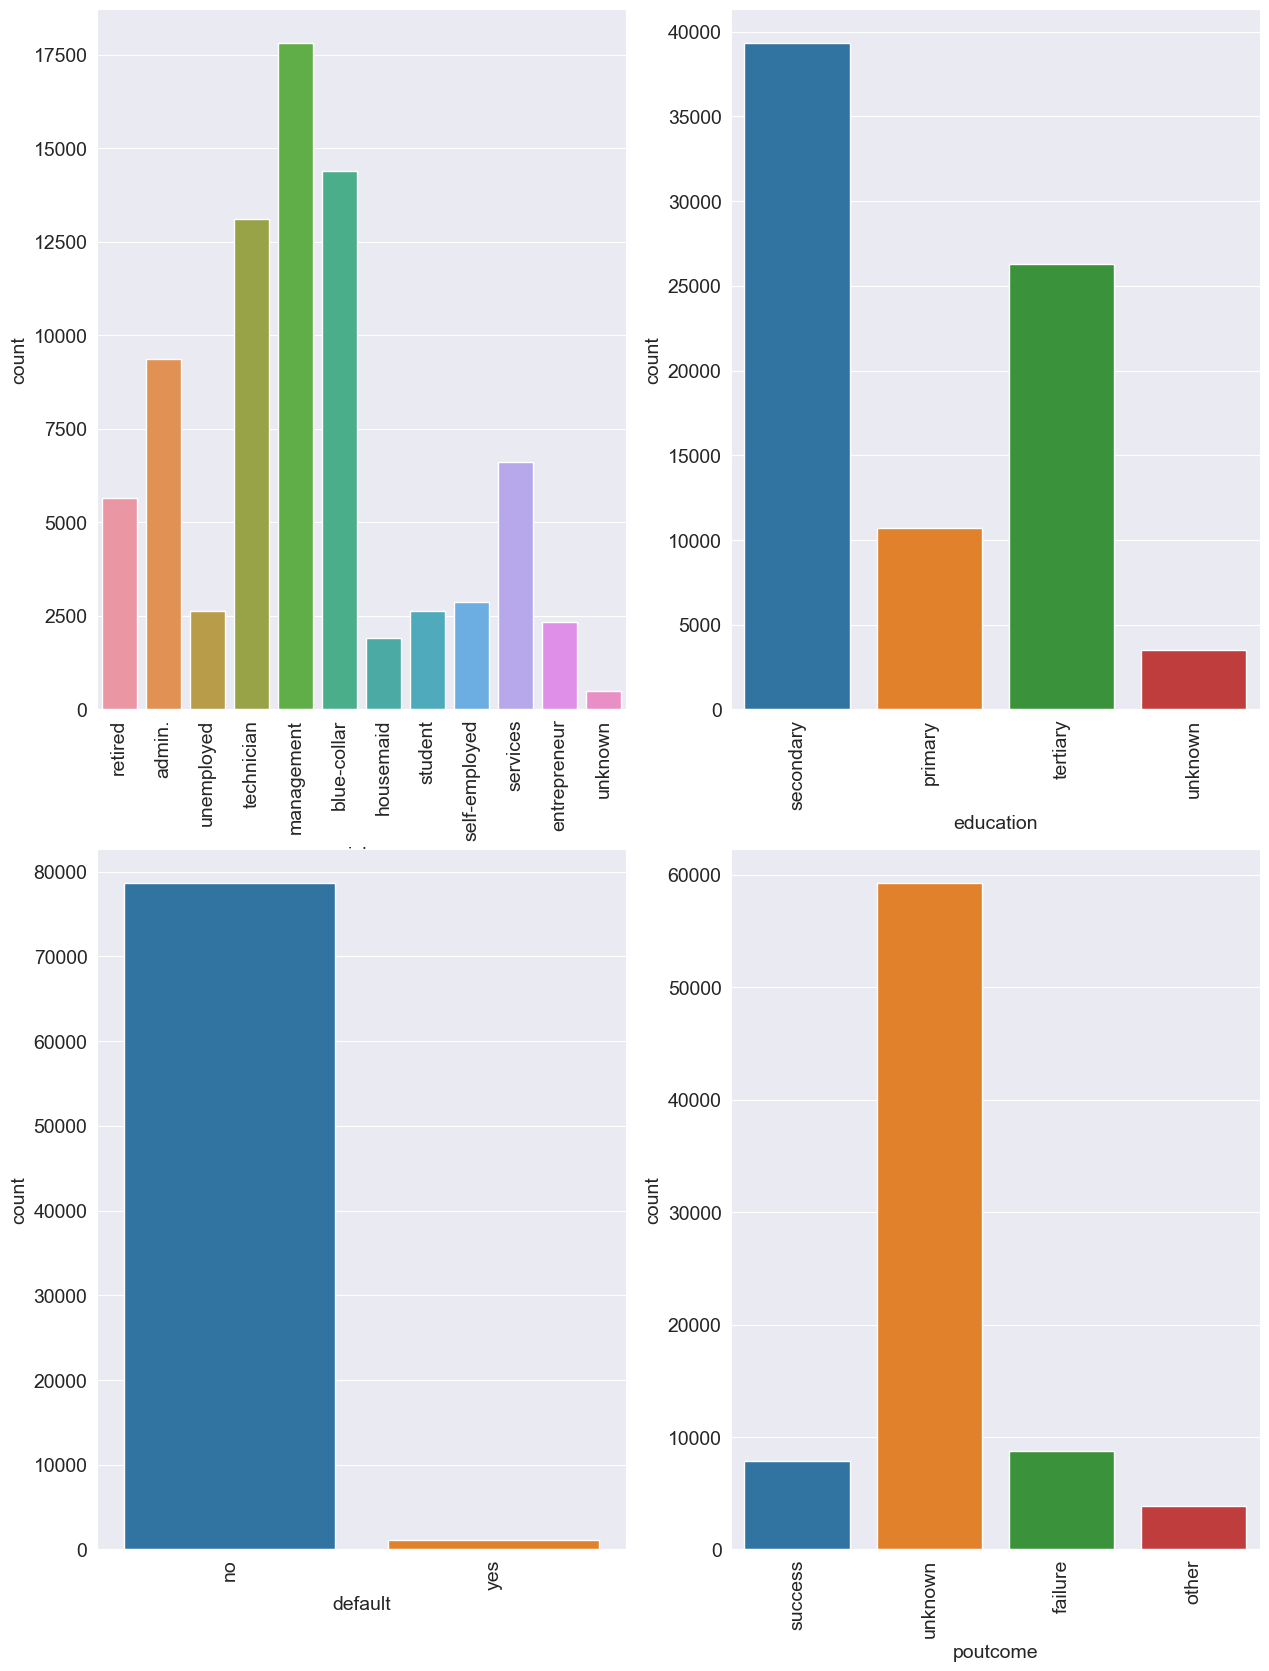

In [17]:
plt.figure(figsize=(15,20))
for i in enumerate(req_cat):
    plt.subplot(2,2,i[0]+1)
    sns.countplot(x=df[i[1]])
    plt.xticks(rotation ='vertical')

In [18]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Data Formatting

# Categorical encoding:
<li>job</li>
<li>education</li>
<li>default</li>
<li>month</li>

# Scaling
<li>age</li>
<li>balance</li>
<li>duration</li>

<li>Create a new dummy year column</li>
<li>Create current_date column</li>
<li>new_column= current_date - dummy_column</li>

In [19]:
import random

In [20]:
len(df)

79844

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79844 entries, 42873 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        79844 non-null  int64 
 1   job        79844 non-null  object
 2   marital    79844 non-null  object
 3   education  79844 non-null  object
 4   default    79844 non-null  object
 5   balance    79844 non-null  int64 
 6   housing    79844 non-null  object
 7   loan       79844 non-null  object
 8   contact    79844 non-null  object
 9   day        79844 non-null  int64 
 10  month      79844 non-null  object
 11  duration   79844 non-null  int64 
 12  campaign   79844 non-null  int64 
 13  pdays      79844 non-null  int64 
 14  previous   79844 non-null  int64 
 15  poutcome   79844 non-null  object
 16  y          79844 non-null  object
dtypes: int64(7), object(10)
memory usage: 13.0+ MB


In [22]:
dummy_year = random.choices([2009,2010],k=len(df))

In [23]:
demo = df.copy()

In [24]:
demo['year'] = dummy_year

In [25]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79844 entries, 42873 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        79844 non-null  int64 
 1   job        79844 non-null  object
 2   marital    79844 non-null  object
 3   education  79844 non-null  object
 4   default    79844 non-null  object
 5   balance    79844 non-null  int64 
 6   housing    79844 non-null  object
 7   loan       79844 non-null  object
 8   contact    79844 non-null  object
 9   day        79844 non-null  int64 
 10  month      79844 non-null  object
 11  duration   79844 non-null  int64 
 12  campaign   79844 non-null  int64 
 13  pdays      79844 non-null  int64 
 14  previous   79844 non-null  int64 
 15  poutcome   79844 non-null  object
 16  y          79844 non-null  object
 17  year       79844 non-null  int64 
dtypes: int64(8), object(10)
memory usage: 13.6+ MB


In [26]:
demo['month'].unique()

array(['feb', 'may', 'jul', 'apr', 'oct', 'jun', 'dec', 'jan', 'mar',
       'sep', 'aug', 'nov'], dtype=object)

In [27]:
demo.head(11)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,year
42873,62,retired,married,secondary,no,569,no,no,cellular,4,feb,94,5,184,1,success,yes,2009
5856,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes,2009
18780,58,unemployed,married,primary,no,1183,no,no,cellular,31,jul,1721,5,-1,0,unknown,yes,2009
39214,32,technician,single,tertiary,no,2684,yes,no,cellular,18,may,542,2,-1,0,unknown,yes,2009
31771,65,retired,married,secondary,no,20806,no,no,telephone,8,apr,523,2,-1,0,unknown,yes,2010
42033,30,admin.,single,secondary,no,914,yes,no,cellular,28,oct,524,3,272,1,failure,yes,2010
10403,40,management,married,secondary,no,406,yes,no,unknown,12,jun,577,2,-1,0,unknown,yes,2009
31526,47,blue-collar,married,secondary,no,1612,yes,no,cellular,2,apr,1164,1,-1,0,unknown,yes,2010
31118,37,management,married,tertiary,no,5355,no,no,telephone,17,feb,466,4,-1,0,unknown,yes,2010
42457,49,technician,married,secondary,no,307,no,no,cellular,9,dec,854,1,-1,0,unknown,yes,2010


In [28]:
demo['month'] =demo['month'].replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

In [29]:
demo.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,year
42873,62,retired,married,secondary,no,569,no,no,cellular,4,2,94,5,184,1,success,yes,2009
5856,32,admin.,single,secondary,no,620,yes,no,unknown,26,5,1234,3,-1,0,unknown,yes,2009
18780,58,unemployed,married,primary,no,1183,no,no,cellular,31,7,1721,5,-1,0,unknown,yes,2009
39214,32,technician,single,tertiary,no,2684,yes,no,cellular,18,5,542,2,-1,0,unknown,yes,2009
31771,65,retired,married,secondary,no,20806,no,no,telephone,8,4,523,2,-1,0,unknown,yes,2010


In [30]:
date_dummy = demo[['year','month','day']].apply(lambda x:'-'.join(x.values.astype(str)), axis="columns")

In [31]:
demo['date']=date_dummy

In [32]:
demo['date']=pd.to_datetime(demo['date'])

In [33]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79844 entries, 42873 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   age        79844 non-null  int64         
 1   job        79844 non-null  object        
 2   marital    79844 non-null  object        
 3   education  79844 non-null  object        
 4   default    79844 non-null  object        
 5   balance    79844 non-null  int64         
 6   housing    79844 non-null  object        
 7   loan       79844 non-null  object        
 8   contact    79844 non-null  object        
 9   day        79844 non-null  int64         
 10  month      79844 non-null  int64         
 11  duration   79844 non-null  int64         
 12  campaign   79844 non-null  int64         
 13  pdays      79844 non-null  int64         
 14  previous   79844 non-null  int64         
 15  poutcome   79844 non-null  object        
 16  y          79844 non-null  object   

In [34]:
import datetime as dt

In [35]:
a=dt.datetime.today()

In [36]:
d = str(a.year) + '-' + str(a.month) + '-' + str(a.day)

In [37]:
d

'2023-11-10'

In [38]:
l=[0] * len(demo)

In [39]:
len(l),d[0]

(79844, '2')

In [40]:
l = [d] * len(demo)

In [41]:
len(l)

79844

In [42]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79844 entries, 42873 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   age        79844 non-null  int64         
 1   job        79844 non-null  object        
 2   marital    79844 non-null  object        
 3   education  79844 non-null  object        
 4   default    79844 non-null  object        
 5   balance    79844 non-null  int64         
 6   housing    79844 non-null  object        
 7   loan       79844 non-null  object        
 8   contact    79844 non-null  object        
 9   day        79844 non-null  int64         
 10  month      79844 non-null  int64         
 11  duration   79844 non-null  int64         
 12  campaign   79844 non-null  int64         
 13  pdays      79844 non-null  int64         
 14  previous   79844 non-null  int64         
 15  poutcome   79844 non-null  object        
 16  y          79844 non-null  object   

In [43]:
demo['current_date']=l

In [44]:
demo['current_date']=pd.to_datetime(demo['current_date'])

In [45]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79844 entries, 42873 to 45210
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   age           79844 non-null  int64         
 1   job           79844 non-null  object        
 2   marital       79844 non-null  object        
 3   education     79844 non-null  object        
 4   default       79844 non-null  object        
 5   balance       79844 non-null  int64         
 6   housing       79844 non-null  object        
 7   loan          79844 non-null  object        
 8   contact       79844 non-null  object        
 9   day           79844 non-null  int64         
 10  month         79844 non-null  int64         
 11  duration      79844 non-null  int64         
 12  campaign      79844 non-null  int64         
 13  pdays         79844 non-null  int64         
 14  previous      79844 non-null  int64         
 15  poutcome      79844 non-null  ob

In [46]:
demo.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,year,date,current_date
42873,62,retired,married,secondary,no,569,no,no,cellular,4,2,94,5,184,1,success,yes,2009,2009-02-04,2023-11-10
5856,32,admin.,single,secondary,no,620,yes,no,unknown,26,5,1234,3,-1,0,unknown,yes,2009,2009-05-26,2023-11-10
18780,58,unemployed,married,primary,no,1183,no,no,cellular,31,7,1721,5,-1,0,unknown,yes,2009,2009-07-31,2023-11-10
39214,32,technician,single,tertiary,no,2684,yes,no,cellular,18,5,542,2,-1,0,unknown,yes,2009,2009-05-18,2023-11-10
31771,65,retired,married,secondary,no,20806,no,no,telephone,8,4,523,2,-1,0,unknown,yes,2010,2010-04-08,2023-11-10


In [47]:
len(demo['current_date']-demo['date'])

79844

In [48]:
demo['days']=demo['current_date']-demo['date']

In [49]:
demo.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,year,date,current_date,days
42873,62,retired,married,secondary,no,569,no,no,cellular,4,...,94,5,184,1,success,yes,2009,2009-02-04,2023-11-10,5392 days
5856,32,admin.,single,secondary,no,620,yes,no,unknown,26,...,1234,3,-1,0,unknown,yes,2009,2009-05-26,2023-11-10,5281 days
18780,58,unemployed,married,primary,no,1183,no,no,cellular,31,...,1721,5,-1,0,unknown,yes,2009,2009-07-31,2023-11-10,5215 days
39214,32,technician,single,tertiary,no,2684,yes,no,cellular,18,...,542,2,-1,0,unknown,yes,2009,2009-05-18,2023-11-10,5289 days
31771,65,retired,married,secondary,no,20806,no,no,telephone,8,...,523,2,-1,0,unknown,yes,2010,2010-04-08,2023-11-10,4964 days


In [50]:
demo['days'] = demo['days'].apply(lambda x:str(x).split(' ')[0])

In [51]:
demo.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,year,date,current_date,days
42873,62,retired,married,secondary,no,569,no,no,cellular,4,...,94,5,184,1,success,yes,2009,2009-02-04,2023-11-10,5392
5856,32,admin.,single,secondary,no,620,yes,no,unknown,26,...,1234,3,-1,0,unknown,yes,2009,2009-05-26,2023-11-10,5281
18780,58,unemployed,married,primary,no,1183,no,no,cellular,31,...,1721,5,-1,0,unknown,yes,2009,2009-07-31,2023-11-10,5215
39214,32,technician,single,tertiary,no,2684,yes,no,cellular,18,...,542,2,-1,0,unknown,yes,2009,2009-05-18,2023-11-10,5289
31771,65,retired,married,secondary,no,20806,no,no,telephone,8,...,523,2,-1,0,unknown,yes,2010,2010-04-08,2023-11-10,4964


In [52]:
demo.drop(['day','month'],axis='columns',inplace=True)

In [53]:
demo.drop(['year','date','current_date'],axis='columns',inplace=True)

In [54]:
demo.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,days
42873,62,retired,married,secondary,no,569,no,no,cellular,94,5,184,1,success,yes,5392
5856,32,admin.,single,secondary,no,620,yes,no,unknown,1234,3,-1,0,unknown,yes,5281
18780,58,unemployed,married,primary,no,1183,no,no,cellular,1721,5,-1,0,unknown,yes,5215
39214,32,technician,single,tertiary,no,2684,yes,no,cellular,542,2,-1,0,unknown,yes,5289
31771,65,retired,married,secondary,no,20806,no,no,telephone,523,2,-1,0,unknown,yes,4964


In [55]:
demo['y'].value_counts()

yes    39922
no     39922
Name: y, dtype: int64

In [56]:
demo['y'] = demo['y'].replace({"yes":1,"no":0})

In [57]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79844 entries, 42873 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        79844 non-null  int64 
 1   job        79844 non-null  object
 2   marital    79844 non-null  object
 3   education  79844 non-null  object
 4   default    79844 non-null  object
 5   balance    79844 non-null  int64 
 6   housing    79844 non-null  object
 7   loan       79844 non-null  object
 8   contact    79844 non-null  object
 9   duration   79844 non-null  int64 
 10  campaign   79844 non-null  int64 
 11  pdays      79844 non-null  int64 
 12  previous   79844 non-null  int64 
 13  poutcome   79844 non-null  object
 14  y          79844 non-null  int64 
 15  days       79844 non-null  object
dtypes: int64(7), object(9)
memory usage: 12.4+ MB


In [58]:
demo['days'] = demo['days'].astype('int')

In [59]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79844 entries, 42873 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        79844 non-null  int64 
 1   job        79844 non-null  object
 2   marital    79844 non-null  object
 3   education  79844 non-null  object
 4   default    79844 non-null  object
 5   balance    79844 non-null  int64 
 6   housing    79844 non-null  object
 7   loan       79844 non-null  object
 8   contact    79844 non-null  object
 9   duration   79844 non-null  int64 
 10  campaign   79844 non-null  int64 
 11  pdays      79844 non-null  int64 
 12  previous   79844 non-null  int64 
 13  poutcome   79844 non-null  object
 14  y          79844 non-null  int64 
 15  days       79844 non-null  int32 
dtypes: int32(1), int64(7), object(8)
memory usage: 12.1+ MB


In [60]:
demo.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,days
42873,62,retired,married,secondary,no,569,no,no,cellular,94,5,184,1,success,1,5392
5856,32,admin.,single,secondary,no,620,yes,no,unknown,1234,3,-1,0,unknown,1,5281
18780,58,unemployed,married,primary,no,1183,no,no,cellular,1721,5,-1,0,unknown,1,5215
39214,32,technician,single,tertiary,no,2684,yes,no,cellular,542,2,-1,0,unknown,1,5289
31771,65,retired,married,secondary,no,20806,no,no,telephone,523,2,-1,0,unknown,1,4964


In [61]:
demo.corr()

C:\Users\admin\AppData\Local\Temp\ipykernel_3388\3575074781.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  demo.corr()


,age,balance,duration,campaign,pdays,previous,y,days
age,1.000000,0.112134,-0.001741,-0.006730,0.005398,0.022205,0.039831,-0.031599
balance,0.112134,1.000000,0.015267,-0.011892,0.015953,0.025010,0.076872,-0.025828
duration,-0.001741,0.015267,1.000000,-0.031296,-0.033816,-0.024805,0.450697,-0.002677
campaign,-0.006730,-0.011892,-0.031296,1.000000,-0.100820,-0.050571,-0.135883,-0.019956
pdays,0.005398,0.015953,-0.033816,-0.100820,1.000000,0.463903,0.142341,0.016420
previous,0.022205,0.025010,-0.024805,-0.050571,0.463903,1.000000,0.135013,-0.000478
y,0.039831,0.076872,0.450697,-0.135883,0.142341,0.135013,1.000000,-0.006545
days,-0.031599,-0.025828,-0.002677,-0.019956,0.016420,-0.000478,-0.006545,1.000000


In [62]:
demo.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y', 'days'],
      dtype='object')

In [63]:
demo = demo[['age','job','education','default','balance','housing','loan','campaign','pdays','previous','poutcome','duration','days','y']]

In [64]:
demo.head()

,age,job,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,duration,days,y
42873,62,retired,secondary,no,569,no,no,5,184,1,success,94,5392,1
5856,32,admin.,secondary,no,620,yes,no,3,-1,0,unknown,1234,5281,1
18780,58,unemployed,primary,no,1183,no,no,5,-1,0,unknown,1721,5215,1
39214,32,technician,tertiary,no,2684,yes,no,2,-1,0,unknown,542,5289,1
31771,65,retired,secondary,no,20806,no,no,2,-1,0,unknown,523,4964,1


In [65]:
df['poutcome'].value_counts()

unknown    59296
failure     8797
success     7881
other       3870
Name: poutcome, dtype: int64

In [66]:
demo1=demo.copy()

In [67]:
demo1.drop(columns=['duration','days'],inplace=True)

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test = train_test_split(demo1.drop('y',axis=1), demo1['y'],test_size=0.2,random_state=42)

trf1 = ColumnTransformer([
    ('scaler',MinMaxScaler(),[0,4,7,8]),
    ('encoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first'),[1,2,3,5,6,10]),
],remainder='passthrough')

X_train.head()

,age,job,education,default,balance,housing,loan,campaign,pdays,previous,poutcome
38923,29,admin.,secondary,no,305,yes,no,4,304,1,failure
39452,28,self-employed,tertiary,no,2503,no,no,1,-1,0,unknown
1915,34,blue-collar,primary,no,359,yes,no,3,-1,0,unknown
27662,32,admin.,tertiary,no,79,yes,no,2,-1,0,unknown
34035,30,admin.,secondary,no,270,no,no,1,80,1,success


In [69]:
y_train

38923    0
39452    1
1915     0
27662    0
34035    1
        ..
29488    1
15631    0
39692    0
12491    1
41234    1
Name: y, Length: 63875, dtype: int64

In [70]:
import pickle
from sklearn.metrics import confusion_matrix
X_train = trf1.fit_transform(X_train)
X_test = trf1.transform(X_test)


pickle.dump(trf1,open("preprocessing.pkl", "wb"))

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

pickle.dump(model ,open("model.pkl", "wb"))

y_pred = model.predict(X_train)

accuracy_score(y_pred,y_train)
confusion_matrix(y_pred,y_train)

array([[31778,    13],
       [   97, 31987]], dtype=int64)

# OneHotEncoder

In [71]:
demo['default']=demo['default'].replace({"yes":1,"no":0})

In [72]:
demo['default'] = demo['default'].astype('int')

In [73]:
demo['housing']=demo['housing'].apply(lambda x:1 if x=='yes' else 0)
demo['loan']=demo['loan'].apply(lambda x:1 if x=='yes' else 0)

In [1]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [2]:
cat_cols = ['job','education','poutcome']

In [5]:
encoder.fit(demo[cat_cols])

NameError: name 'X_train' is not defined

In [77]:
encoder.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 array(['failure', 'other', 'success', 'unknown'], dtype=object)]

In [78]:
encoded_cols = list(encoder.get_feature_names_out(cat_cols))
encoded_cols

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [79]:
demo[encoded_cols] = encoder.fit_transform(demo[cat_cols])

In [80]:
demo.head()

,age,job,education,default,balance,housing,loan,campaign,pdays,previous,...,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
42873,62,retired,secondary,0,569,0,0,5,184,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5856,32,admin.,secondary,0,620,1,0,3,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
18780,58,unemployed,primary,0,1183,0,0,5,-1,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39214,32,technician,tertiary,0,2684,1,0,2,-1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
31771,65,retired,secondary,0,20806,0,0,2,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [81]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79844 entries, 42873 to 45210
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  79844 non-null  int64  
 1   job                  79844 non-null  object 
 2   education            79844 non-null  object 
 3   default              79844 non-null  int32  
 4   balance              79844 non-null  int64  
 5   housing              79844 non-null  int64  
 6   loan                 79844 non-null  int64  
 7   campaign             79844 non-null  int64  
 8   pdays                79844 non-null  int64  
 9   previous             79844 non-null  int64  
 10  poutcome             79844 non-null  object 
 11  duration             79844 non-null  int64  
 12  days                 79844 non-null  int32  
 13  y                    79844 non-null  int64  
 14  job_admin.           79844 non-null  float64
 15  job_blue-collar      79844 non-n

In [82]:
demo[encoded_cols] = demo[encoded_cols].astype('int')

In [83]:
demo.drop(['job','poutcome','education'],axis='columns',inplace=True)

In [84]:
demo.head()

,age,default,balance,housing,loan,campaign,pdays,previous,duration,days,...,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
42873,62,0,569,0,0,5,184,1,94,5392,...,0,0,0,1,0,0,0,0,1,0
5856,32,0,620,1,0,3,-1,0,1234,5281,...,0,0,0,1,0,0,0,0,0,1
18780,58,0,1183,0,0,5,-1,0,1721,5215,...,1,0,1,0,0,0,0,0,0,1
39214,32,0,2684,1,0,2,-1,0,542,5289,...,0,0,0,0,1,0,0,0,0,1
31771,65,0,20806,0,0,2,-1,0,523,4964,...,0,0,0,1,0,0,0,0,0,1


In [85]:
demo['housing']=demo['housing'].apply(lambda x:1 if x=='yes' else 0)
demo['loan']=demo['loan'].apply(lambda x:1 if x=='yes' else 0)

# Scaling numeric cols

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
scaler = MinMaxScaler()

In [88]:
cols = ['age','balance','duration','days']

In [89]:
scaler.fit(demo[cols])

MinMaxScaler()

In [90]:
demo[cols] = scaler.fit_transform(demo[cols])

In [91]:
# demo['duration']=s

In [92]:
demo.head()

,age,default,balance,housing,loan,campaign,pdays,previous,duration,days,...,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
42873,0.571429,0,0.077969,0,0,5,184,1,0.019113,0.959945,...,0,0,0,1,0,0,0,0,1,0
5856,0.181818,0,0.078432,0,0,3,-1,0,0.250915,0.806630,...,0,0,0,1,0,0,0,0,0,1
18780,0.519481,0,0.083544,0,0,5,-1,0,0.349939,0.715470,...,1,0,1,0,0,0,0,0,0,1
39214,0.181818,0,0.097171,0,0,2,-1,0,0.110207,0.817680,...,0,0,0,0,1,0,0,0,0,1
31771,0.610390,0,0.261698,0,0,2,-1,0,0.106344,0.368785,...,0,0,0,1,0,0,0,0,0,1


In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test = train_test_split(demo.drop('y',axis=1), demo['y'],test_size=0.2,random_state=42)

In [95]:
X_train

,age,default,balance,housing,loan,campaign,pdays,previous,duration,days,...,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
38923,0.142857,0,0.075572,0,0,4,304,1,0.003660,0.313536,...,0,0,0,1,0,0,1,0,0,0
39452,0.129870,0,0.095528,0,0,1,-1,0,0.086621,0.808011,...,0,0,0,0,1,0,0,0,0,1
1915,0.207792,0,0.076063,0,0,3,-1,0,0.031314,0.830110,...,0,0,1,0,0,0,0,0,0,1
27662,0.181818,0,0.073521,0,0,2,-1,0,0.007523,0.559392,...,0,0,0,0,1,0,0,0,0,1
34035,0.155844,0,0.075255,0,0,1,80,1,0.088857,0.842541,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29488,0.233766,0,0.084524,0,0,1,-1,0,0.060594,0.457182,...,1,0,0,0,1,0,0,0,0,1
15631,0.246753,0,0.055699,0,0,1,-1,0,0.039244,0.729282,...,0,0,0,0,1,0,0,0,0,1
39692,0.272727,0,0.104316,0,0,1,-1,0,0.022977,0.301105,...,0,0,0,1,0,0,0,0,0,1
12491,0.246753,0,0.072803,0,0,2,-1,0,0.230785,0.252762,...,0,0,0,0,1,0,0,0,0,1


In [96]:
y_train

38923    0
39452    1
1915     0
27662    0
34035    1
        ..
29488    1
15631    0
39692    0
12491    1
41234    1
Name: y, Length: 63875, dtype: int64

# Model Building

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [98]:
model = LogisticRegression(solver='liblinear')
model1 = DecisionTreeClassifier()

In [99]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [100]:
n = ['default','campaign','pdays','previous']

In [101]:
model.fit(X_train[cols + n + encoded_cols],y_train)
model1.fit(X_train[cols + n + encoded_cols],y_train)

DecisionTreeClassifier()

In [102]:
y_pred= model.predict(X_test[cols + n + encoded_cols])
y_pred1= model1.predict(X_test[cols + n + encoded_cols])

In [103]:
accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred1)

(0.7873379673116664, 0.9356878952971383)

In [104]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.77      0.83      0.80      8047\n           1       0.81      0.74      0.78      7922\n\n    accuracy                           0.79     15969\n   macro avg       0.79      0.79      0.79     15969\nweighted avg       0.79      0.79      0.79     15969\n'

In [105]:
classification_report(y_test,y_pred1)

'              precision    recall  f1-score   support\n\n           0       0.99      0.88      0.93      8047\n           1       0.89      0.99      0.94      7922\n\n    accuracy                           0.94     15969\n   macro avg       0.94      0.94      0.94     15969\nweighted avg       0.94      0.94      0.94     15969\n'

In [106]:
train_probs = model.predict_proba(X_train[cols + n + encoded_cols])
train_probs

array([[0.85230227, 0.14769773],
       [0.39957819, 0.60042181],
       [0.90230647, 0.09769353],
       ...,
       [0.8427683 , 0.1572317 ],
       [0.02091568, 0.97908432],
       [0.02171622, 0.97828378]])

In [107]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
42873,62,retired,married,secondary,no,569,no,no,cellular,4,feb,94,5,184,1,success,yes
5856,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes
18780,58,unemployed,married,primary,no,1183,no,no,cellular,31,jul,1721,5,-1,0,unknown,yes
39214,32,technician,single,tertiary,no,2684,yes,no,cellular,18,may,542,2,-1,0,unknown,yes
31771,65,retired,married,secondary,no,20806,no,no,telephone,8,apr,523,2,-1,0,unknown,yes


In [108]:
def predict_inputs(single_inputs):
    input_df = pd.DataFrame([single_inputs])
    input_df['default']=input_df['default'].replace({"yes":1,"no":0}).astype('int')
    input_df[cols] = scaler.transform(input_df[cols])
    input_df[encoded_cols] = encoder.transform(input_df[cat_cols])
    x_input = input_df[cols + ['default'] + n[1:] + encoded_cols]
    pred = model.predict(x_input)[0]
#     prob = model.predict_proba(x_input)[0][list(model.classes_).index(pred)]
    return pred

In [109]:
# age,job,education,default,housing,loan,balance,days,duration,campaign,pdays,previous,poutcome

In [110]:
new_inputs = {
    'age':30,
    'job':'technician',
    'education':'secondary',
    'default':'no',
    'balance':40000,
    'duration':400,
    'days':10000,
    'campaign':4,
    'pdays':239,
    'previous':0,
    'poutcome':'failure'
}

In [111]:
predict_inputs(new_inputs)

1